# SALARY STRUCTURE ANALYSIS REPORT

In [2]:
import pandas as pd

In [4]:
data=pd.read_csv("Salaries.csv")
data

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


In [6]:
data.head(10)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [8]:
data.size

468

In [10]:
data.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


In [14]:
data.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [18]:
data['rank'].value_counts()

rank
Prof         46
AsstProf     19
AssocProf    13
Name: count, dtype: int64

In [20]:
data['discipline'].value_counts()

discipline
B    42
A    36
Name: count, dtype: int64

In [22]:
data['sex'].value_counts()

sex
Male      39
Female    39
Name: count, dtype: int64

In [24]:
a=[data[(data['salary']>150000)]]
a

[    rank discipline  phd  service     sex  salary
 0   Prof          B   56       49    Male  186960
 13  Prof          B   35       33    Male  162200
 14  Prof          B   25       19    Male  153750
 15  Prof          B   17        3    Male  150480
 19  Prof          A   29       27    Male  150500
 27  Prof          A   45       43    Male  155865
 31  Prof          B   22       21    Male  155750
 44  Prof          B   23       19  Female  151768
 72  Prof          B   24       15  Female  161101]

In [26]:
b=data.groupby('sex')['salary'].mean().sort_values()
b

sex
Female    101002.410256
Male      115045.153846
Name: salary, dtype: float64

In [28]:
c=[data[(data['service']>20) & (data['salary']<100000)]]
c

[         rank discipline  phd  service     sex  salary
 9        Prof          A   51       51    Male   57800
 24       Prof          A   30       23    Male   91100
 25       Prof          B   35       31    Male   99418
 54  AssocProf          A   25       22  Female   62884
 63       Prof          A   29       27  Female   91000
 64  AssocProf          A   26       24  Female   73300]

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

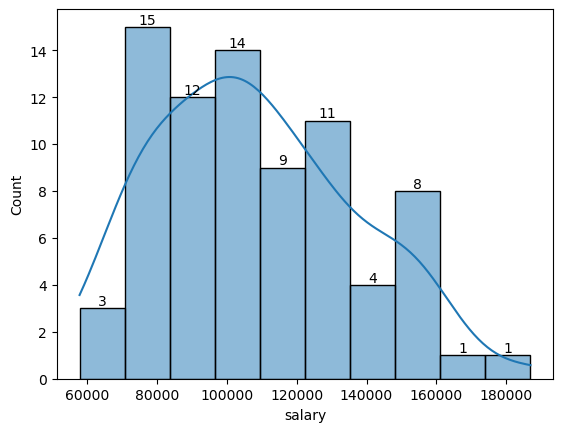

In [32]:
ab=sns.histplot(data['salary'], bins=10, kde=True)
for bars in ab.containers:
    ab.bar_label(bars)

## 1. Salary Distribution

### The salary distribution shows that some employees earn between 85,000 and 130,000, with a few earning significantly more. This suggests that while the majority of salaries are within a typical range, some employees, likely those with more experience or in higher positions. receive much higher compensation.

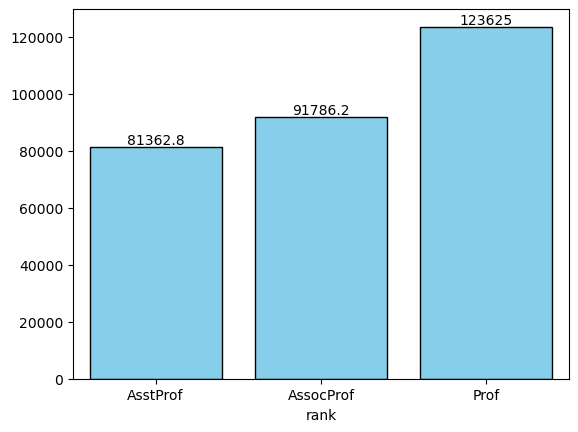

In [39]:
avg_salary_rank = data.groupby('rank')['salary'].mean().sort_values()
bc=sns.barplot(x=avg_salary_rank.index, y=avg_salary_rank.values, facecolor='skyblue', edgecolor='black')
for bars in bc.containers:
    bc.bar_label(bars)

## 2. Average Salary By Rank

### When examining salaries by rank, its clear that Professors have the highest average salaries, followed by Associate and Assistant Prof. This aligns with the expectation that higher-ranking positions, which usually come with more responsibilities and experience, are compensated with higher pay.

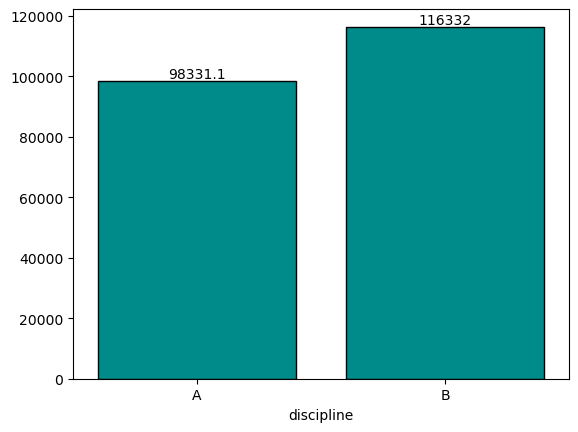

In [44]:
avg_salary_discipline=data.groupby('discipline')['salary'].mean().sort_values()
cd=sns.barplot(x=avg_salary_discipline.index, y=avg_salary_discipline.values, facecolor='darkcyan', edgecolor='black')
for bars in cd.containers:
    cd.bar_label(bars)

## 3. Average Salary By Discipline

### Employees working in Discipline B tend to earn slightly more on average than those in Discipline A. This difference could be due to factors such as the varying demand for skills or funding differences between the Disciplines, making certain fields more lucrative.

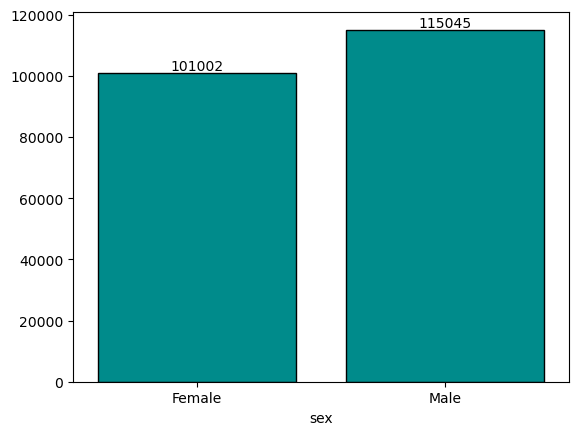

In [48]:
avg_salary_gender=data.groupby('sex')['salary'].mean().sort_values()
de=sns.barplot(x=avg_salary_gender.index, y=avg_salary_gender.values, facecolor='darkcyan', edgecolor='black')
for bars in de.containers:
    de.bar_label(bars)

## 4. Average Salary By Gender

### The analysis reveals a small difference in average salaries between males and females, with males earning a bit more. Although the gap isn't large, it's an important area to monitor to ensure that salary practices are fair and equitable across the company.

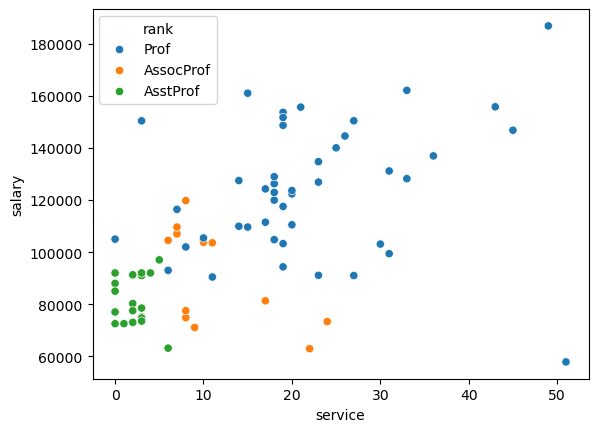

In [52]:
ef=sns.scatterplot(x=data['service'], y=data['salary'], hue=data['rank'])
for bars in ef.containers:
    ef.bar_label(bars)

## 5. SERVICE Vs SALARY

### There is a clear positive relationship between years of service and salary, especially for Professors. Enployees who have been with the company longer tend to earn more, reflecting their experience, loyalty and contibutions over time.

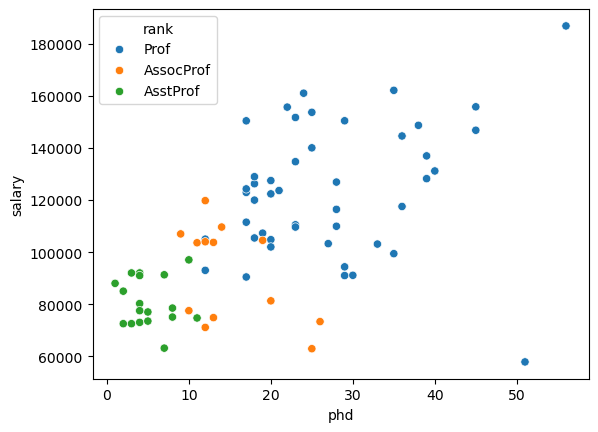

In [56]:
fg=sns.scatterplot(x=data['phd'], y=data['salary'], hue=data['rank'])
for bars in fg.containers:
    fg.bar_label(bars)

## 6. PhD YEARS Vs SALARY

### Employees who earned their PhDs many years ago generally have higher salaries. This suggests that those with more years of experience and advanced knowledge, gained over time, are compensated more highly for their expertise.

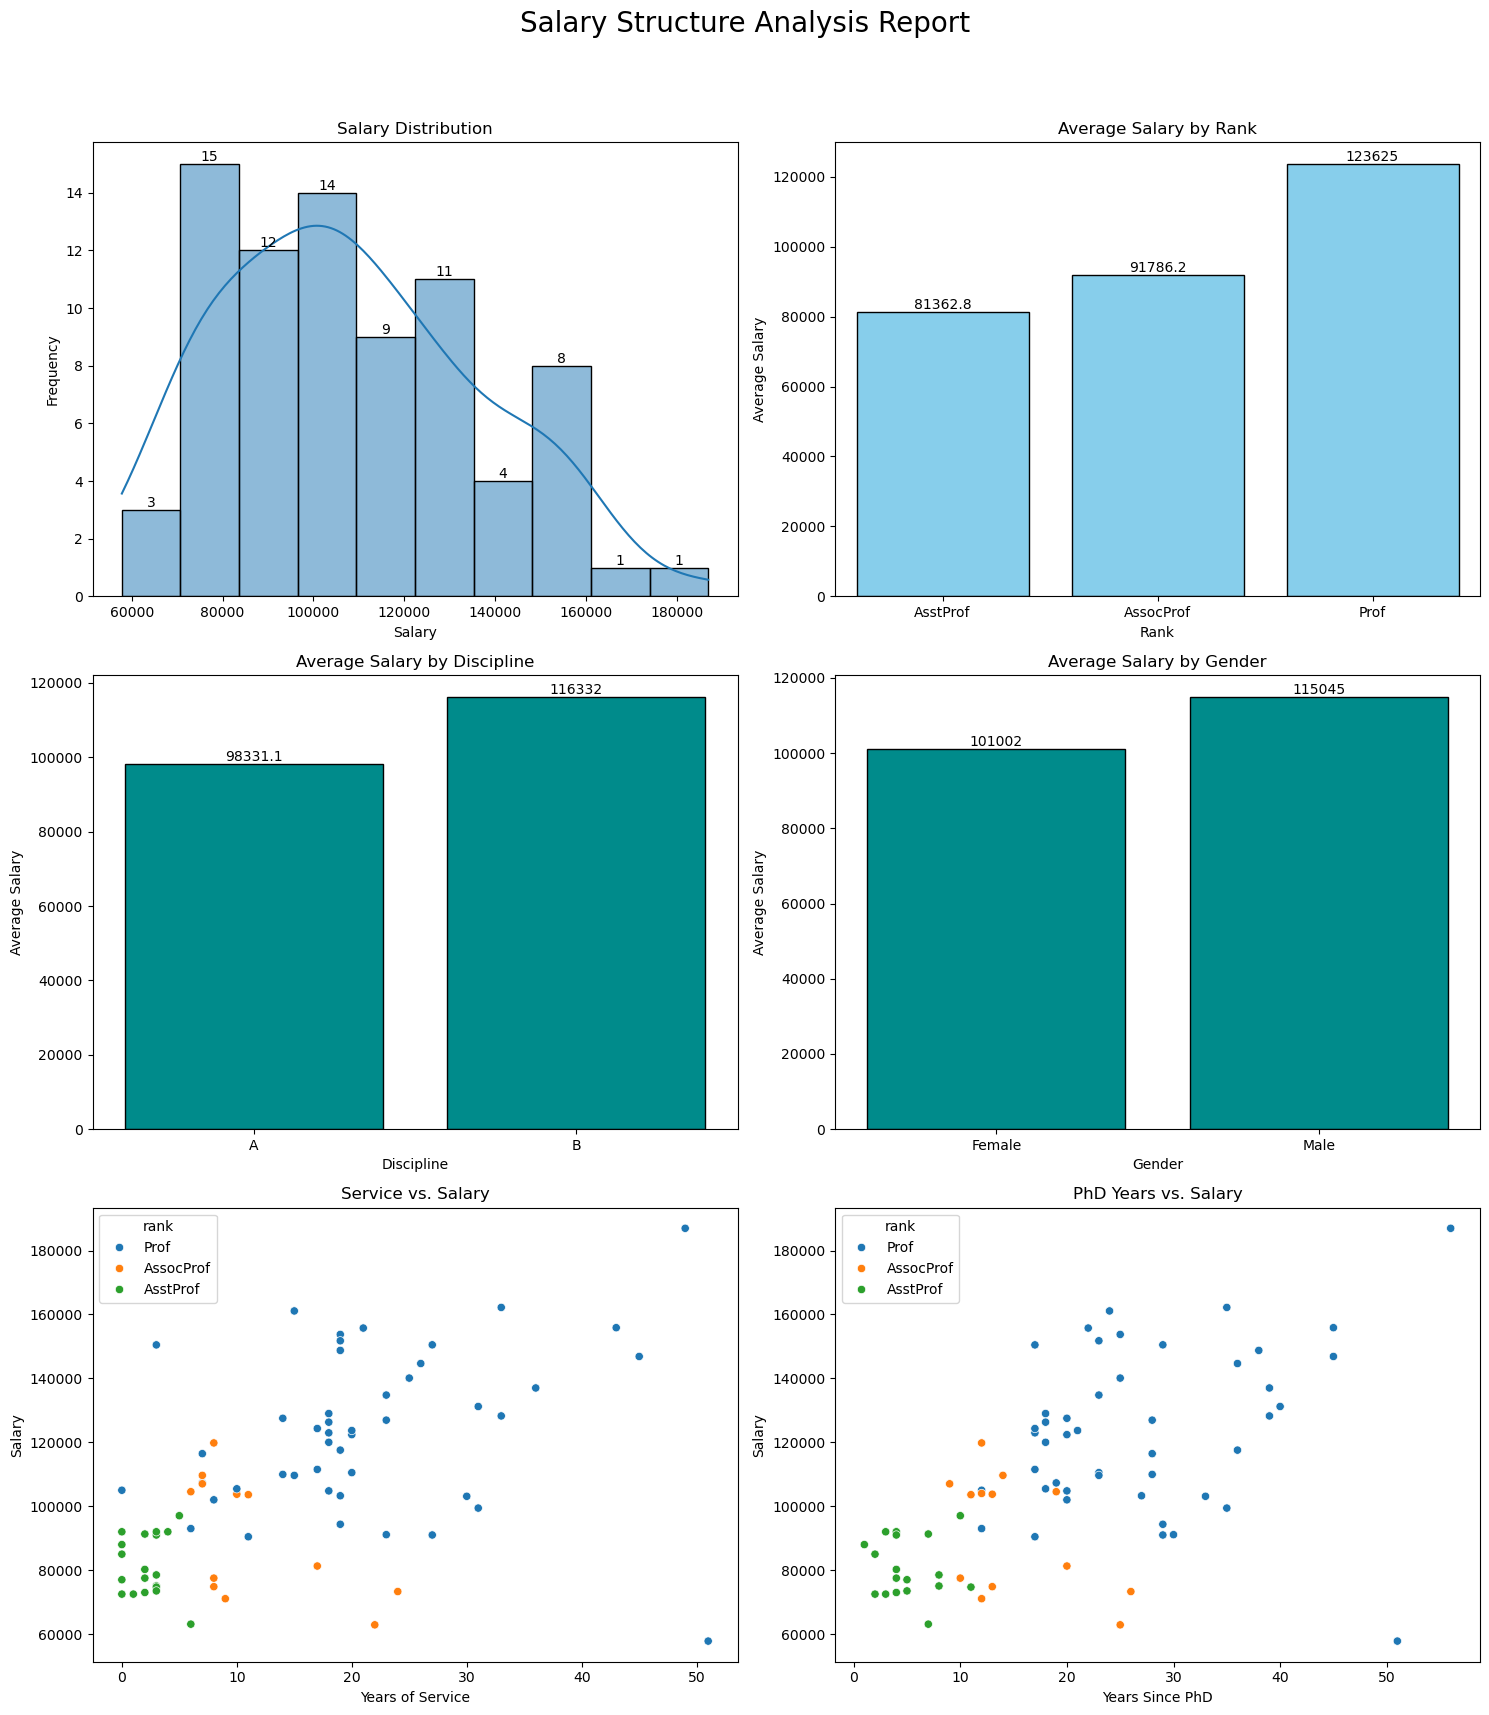

In [60]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Salary Structure Analysis Report', fontsize=20)

# 1. Salary Distribution
ab=sns.histplot(data['salary'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Salary Distribution')
axes[0, 0].set_xlabel('Salary')
axes[0, 0].set_ylabel('Frequency')
for bars in ab.containers:
    ab.bar_label(bars)

# 2. Average Salary by Rank
avg_salary_rank = data.groupby('rank')['salary'].mean().sort_values()
bc=sns.barplot(x=avg_salary_rank.index, y=avg_salary_rank.values, ax=axes[0, 1], facecolor='skyblue', edgecolor='black')
axes[0, 1].set_title('Average Salary by Rank')
axes[0, 1].set_xlabel('Rank')
axes[0, 1].set_ylabel('Average Salary')
for bars in bc.containers:
    bc.bar_label(bars)

# 3. Average Salary by Discipline
avg_salary_discipline = data.groupby('discipline')['salary'].mean().sort_values()
cd=sns.barplot(x=avg_salary_discipline.index, y=avg_salary_discipline.values, ax=axes[1, 0], facecolor='darkcyan', edgecolor='black')
axes[1, 0].set_title('Average Salary by Discipline')
axes[1, 0].set_xlabel('Discipline')
axes[1, 0].set_ylabel('Average Salary')
for bars in cd.containers:
    cd.bar_label(bars)

# 4. Average Salary by Gender
avg_salary_gender = data.groupby('sex')['salary'].mean().sort_values()
de=sns.barplot(x=avg_salary_gender.index, y=avg_salary_gender.values, ax=axes[1, 1], facecolor='darkcyan', edgecolor='black')
axes[1, 1].set_title('Average Salary by Gender')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Average Salary')
for bars in de.containers:
    de.bar_label(bars)

# 5. Service vs. Salary
ef=sns.scatterplot(x=data['service'], y=data['salary'], hue=data['rank'], ax=axes[2, 0])
axes[2, 0].set_title('Service vs. Salary')
axes[2, 0].set_xlabel('Years of Service')
axes[2, 0].set_ylabel('Salary')
for bars in ef.containers:
    ef.bar_label(bars)

# 6. PhD Years vs. Salary
fg=sns.scatterplot(x=data['phd'], y=data['salary'], hue=data['rank'], ax=axes[2, 1])
axes[2, 1].set_title('PhD Years vs. Salary')
axes[2, 1].set_xlabel('Years Since PhD')
axes[2, 1].set_ylabel('Salary')
for bars in fg.containers:
    fg.bar_label(bars)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Final Summary

### Overall, the analysis shows that factors such as rank, discipline, gender, years of service and time since obtaining a PhD  all play a role in determining salary. The dashboard visualizations reveal a consistent pattern where higher ranks, more experience, and longer tenure generally correlate with higher salaries. While most salaries fall within a typical range, there are variations, particularly at the higher end. The small gender pay gap observed highlights the need for ongoing attention to ensure fairness in compensation across the company. This comprehensiveness view of the salary structure can guide decisions related to salary adjustments, hiring, and policy development.  